## Importing the relevant libraries

In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as LinearRegression
import seaborn as sns
sns.set()

In [50]:
cost = pd.read_csv("1.04. Real-life example.csv")
cost.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## let look at parameters that can affect the price of a car. First, the brand(BMW is usually esxpensive than Toyota), Mileage - the more a car is driven the cheaper it should be, EngineVolume - Sports cars have larger engine than economy cars, Year  - the older the car, the cheaper. Others are categorical to be consisdered later

# Preprocessing
## Exploring the descriptive statistics of the variables

In [51]:
cost.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Deatermining the variables of interest

In [52]:
cost = cost.drop(['Model'],axis=1)
# axis is the rows and column. since we are droping column axis=1
cost.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Dealing with missing values
### Rule of thumb: if you are removing <5% of the observations, you are free to just remove all that have missing valuea

In [53]:
#checking null values
cost.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [54]:
# droping the missing values since it is less than 5% of our observation
cost = cost.dropna(axis=0)
cost.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the probability distribution frequencys(PDFs)

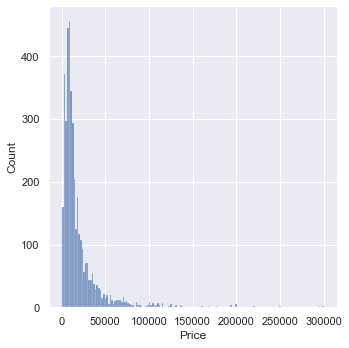

In [55]:
#using seaborn let plot
sns.displot(cost['Price'])

### from the above plot, price has an exponential distribution(it is skewed to the left). But for an optimal results we would need for a normal distribution. Also, looking at the descriptive observation, there is a big discrepancy between the max price and other price  numerical descriptions. This shows we have outliers(observations that lie on abnormal distance from other observation int he data) that are affecting price(it will also affect regression dramatically).
### One way to address that is to remove the top 1% of the observations.

## Dealing with outliers

In [56]:
#removing the top 1% of the observations and keeping the 99%
price_quantile = cost['Price'].quantile(0.99)
new_price = cost[cost['Price']<price_quantile]
new_price.describe(include='all')
    


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


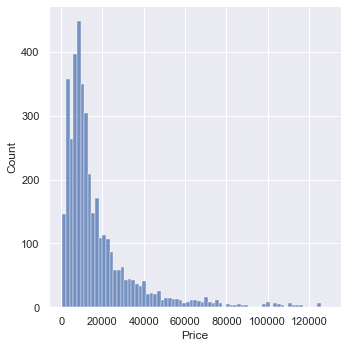

In [57]:
#PDF after removing outliers
sns.displot(new_price['Price'])

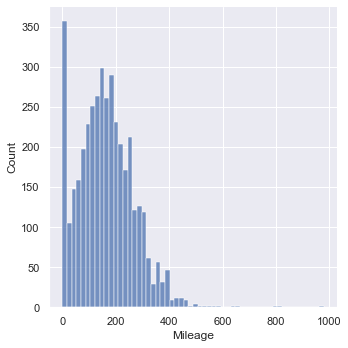

In [58]:
# checking the mileage PDF. Notice we have outliers too

sns.displot(cost['Mileage'])


In [59]:
#removing the top 1% of the observations and keeping the 99%(removing outliers)
mileage_quantile = new_price['Mileage'].quantile(0.99)
new_mileage = new_price[new_price['Mileage']<mileage_quantile]
new_mileage.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


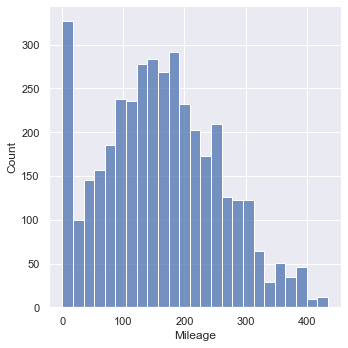

In [60]:
#improved mileage
sns.displot(new_mileage['Mileage'])

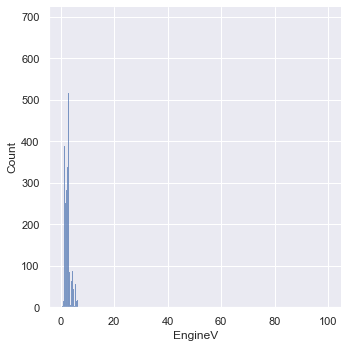

In [61]:
#lets check for engine volume
sns.displot(cost['EngineV'])

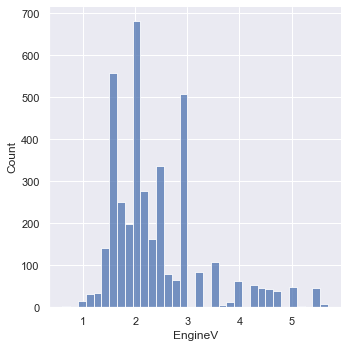

In [62]:
#removing outliers
engineV_quantile = new_mileage['EngineV'].quantile(0.99)
new_engineV = new_mileage[new_mileage['EngineV']<engineV_quantile]
sns.displot(new_engineV['EngineV'])

## Engine volume plot is quite strange. Let check the EngineV values. From google engine volume should be between 0.6 to 6.5. we have 99.9 as engine volume. Therefore, we have incorrect values


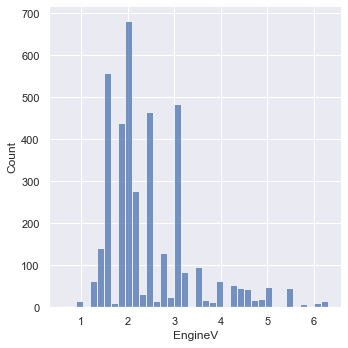

In [63]:
# let benchmark our engine volume to 6.5
new_engineV = new_mileage[new_mileage['EngineV'] <6.5]
sns.displot(new_engineV['EngineV'])

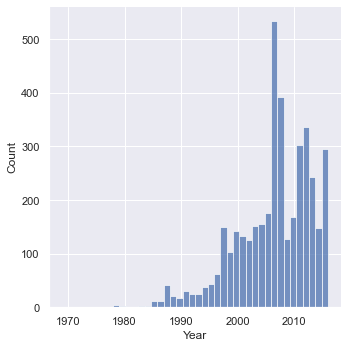

In [64]:
#checking PDF of year
sns.displot(cost['Year'])

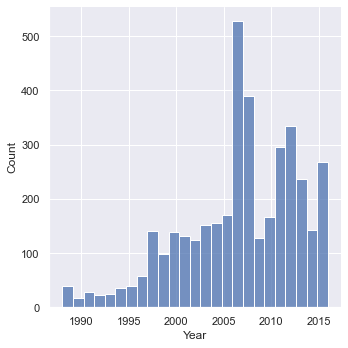

In [65]:
#Year is skewed to the right. the outliers are at the low end. Therefore lets take the fist percentile
year_quantile = new_engineV['Year'].quantile(0.01)
new_year = new_engineV[new_engineV['Year'] > year_quantile]
sns.displot(new_year['Year'])

In [66]:
#let view only relevant data for analysis
cost_cleaned = new_year.reset_index(drop=True)
cost_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## checking the OLS assumptions

## let's plot the scatter plots and check the correlation between price and the 3 continous variables(Year, EngineV and Mileage)


## From the scatter plots below, we can see that the graph has not linear correlation. Hence, we should first transform one or more variables. Even the price is not normallydistributed. 
## we can use log transformations to address this issue.

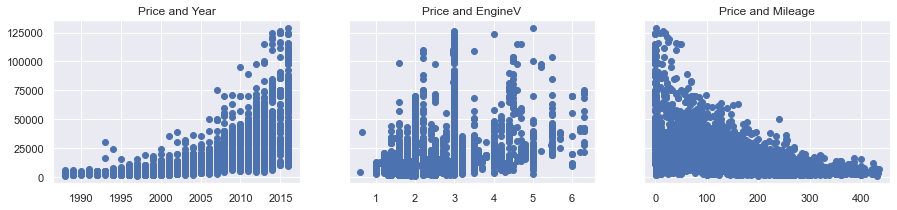

In [67]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(cost_cleaned['Year'], cost_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(cost_cleaned['EngineV'], cost_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(cost_cleaned['Mileage'], cost_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

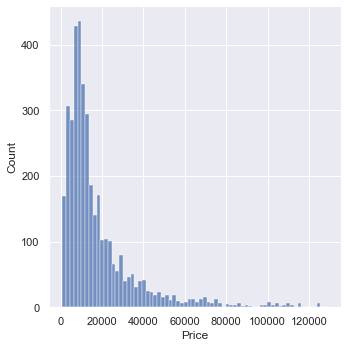

In [68]:
sns.displot(cost_cleaned['Price'])

## Relaxing the assumptions

In [69]:
log_price = np.log(cost_cleaned['Price'])
cost_cleaned['log_price'] = log_price
cost_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


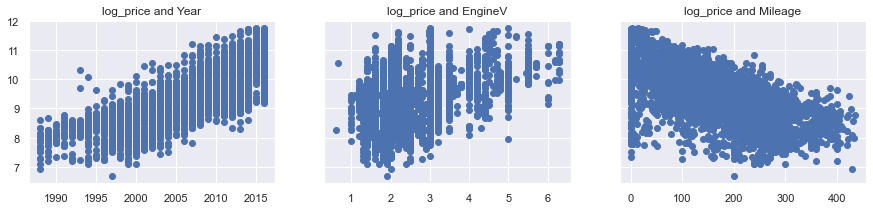

In [70]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(cost_cleaned['Year'], cost_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(cost_cleaned['EngineV'], cost_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(cost_cleaned['Mileage'], cost_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

## from above scatter plot we have a more linear patter. The line fits the data better.



In [74]:
# dropping the original price from the data frame since it's no longer needed
#cost_cleaned = cost_cleaned.drop(['Price'], axis =1)
cost_cleaned


,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


## checking for multicollinearlity between mileage, enginev and year(they're the continous variables)

In [76]:
cost_cleaned.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cost_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns